Name Ihunwo Owhonda

Labpartner(s)

In [3]:
# import statements go here
import random

# Class 13.1 

# Warmups 13.1

**W.0** Install scikitlearn if you don't have it already. It should come standard with your install.

In [7]:
# if you have it this will work:
import sklearn

**W.1 Guessing game** Generate a random number between 1 and 9 (including 1 and 9). Ask the user to guess the number, then tell them whether they guessed too low, too high, or exactly right.

In [9]:
number_to_guess = random.randint(1, 9)

tries = 0

print("Welcome to the guessing game!")
print("I'm thinking of a number between 1 and 9.")

while True:
    user_guess = input("Take a guess: ")

    if user_guess.lower() == "quit":
        print("Okay, the number was {}.".format(number_to_guess))
        break

    try:
        user_guess = int(user_guess)
    except ValueError:
        print("That's not a valid number!")
        continue

    tries += 1
ss
    if user_guess < number_to_guess:
        print("Too low!")
    elif user_guess > number_to_guess:
        print("Too high!")
    else:
        print("Exactly right! You won in {} tries.".format(tries))
        break

Welcome to the guessing game!
I'm thinking of a number between 1 and 9.


Take a guess:  2


Too low!


Take a guess:  7


Too low!


Take a guess:  9


Too high!


Take a guess:  8


Exactly right! You won in 4 tries.


In [10]:
# reminder of how user input works:
name = input("Give me your name: ")
print("Your name is " + name)

Give me your name:  Owhonda Ihunwo


Your name is Owhonda Ihunwo


**W.2** Modify the game: 
- Keep the game going until the user types “exit”
- Keep track of how many guesses the user has taken, and when the game ends, print this out.

In [12]:
number_to_guess = random.randint(1, 9)

tries = 0

print("Welcome to the guessing game!")
print("I'm thinking of a number between 1 and 9.")
print("Type 'exit' to quit the game.")

while True:
   
    user_guess = input("Take a guess: ")
  
    if user_guess.lower() == "exit":
        print("Okay, the number was {}.".format(number_to_guess))
        print("You took {} guesses.".format(tries))
        break

    try:
        user_guess = int(user_guess)
    except ValueError:
        print("That's not a valid number!")
        continue

    tries += 1

    if user_guess < number_to_guess:
        print("Too low!")
    elif user_guess > number_to_guess:
        print("Too high!")
    else:
        print("Exactly right! You won in {} tries.".format(tries))
        print("Do you want to play again? Type 'yes' to continue.")
        play_again = input().lower()
        if play_again == "yes":
            number_to_guess = random.randint(1, 9)
            tries = 0
        else:
            break

Welcome to the guessing game!
I'm thinking of a number between 1 and 9.
Type 'exit' to quit the game.


Take a guess:  8


Too low!


Take a guess:  9


Exactly right! You won in 2 tries.
Do you want to play again? Type 'yes' to continue.


 yes
Take a guess:  8


Too high!


Take a guess:  9


Too high!


Take a guess:  8.5


That's not a valid number!


Take a guess:  7


Too high!


Take a guess:  5


Too high!


Take a guess:  2


Too low!


Take a guess:  3


Exactly right! You won in 6 tries.
Do you want to play again? Type 'yes' to continue.


 6


# Lecture 13.1

## Agenda:
- Machine Learning in Scikit learn
- We are starting the Datacamp machine learning module. They cover some of the things in the scikit-learn package

## Introduction

Machine Learning has emerged as an important tool accross the scientific diciplines and in many business applications. The most commonly used package for machine learning is scikit-learn, which we will play around with this week.

There are a number of types of machine learning algorithms, aka "estimators". A useful flowchart:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

These can be divided up into:

1) Regression. This involves finding the best fit parameters for some model, like with did with linear models.

2) Clustering, which groups data by some similarity criterion (e.g., these data points are grass, these are trees, and these are water because of their spectral data differences). See https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

3) Dimensionality reduction, which breaks data, often timesries data, into principle components. For example if we were looking at a temperature timeseries, we might get as components an annual cycle, a daily cycle, and a multi-year cycle corresponding to ENSO (El Nino - Southern Oscillation), etc.

4) Classification. This uses labeled data to make preditions about what will happen in places you don't have data, for example in this area it is expected to see large green birds and not small red birds, and in another area it is expected to see both types. We will focus on this today.

See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html



## Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below

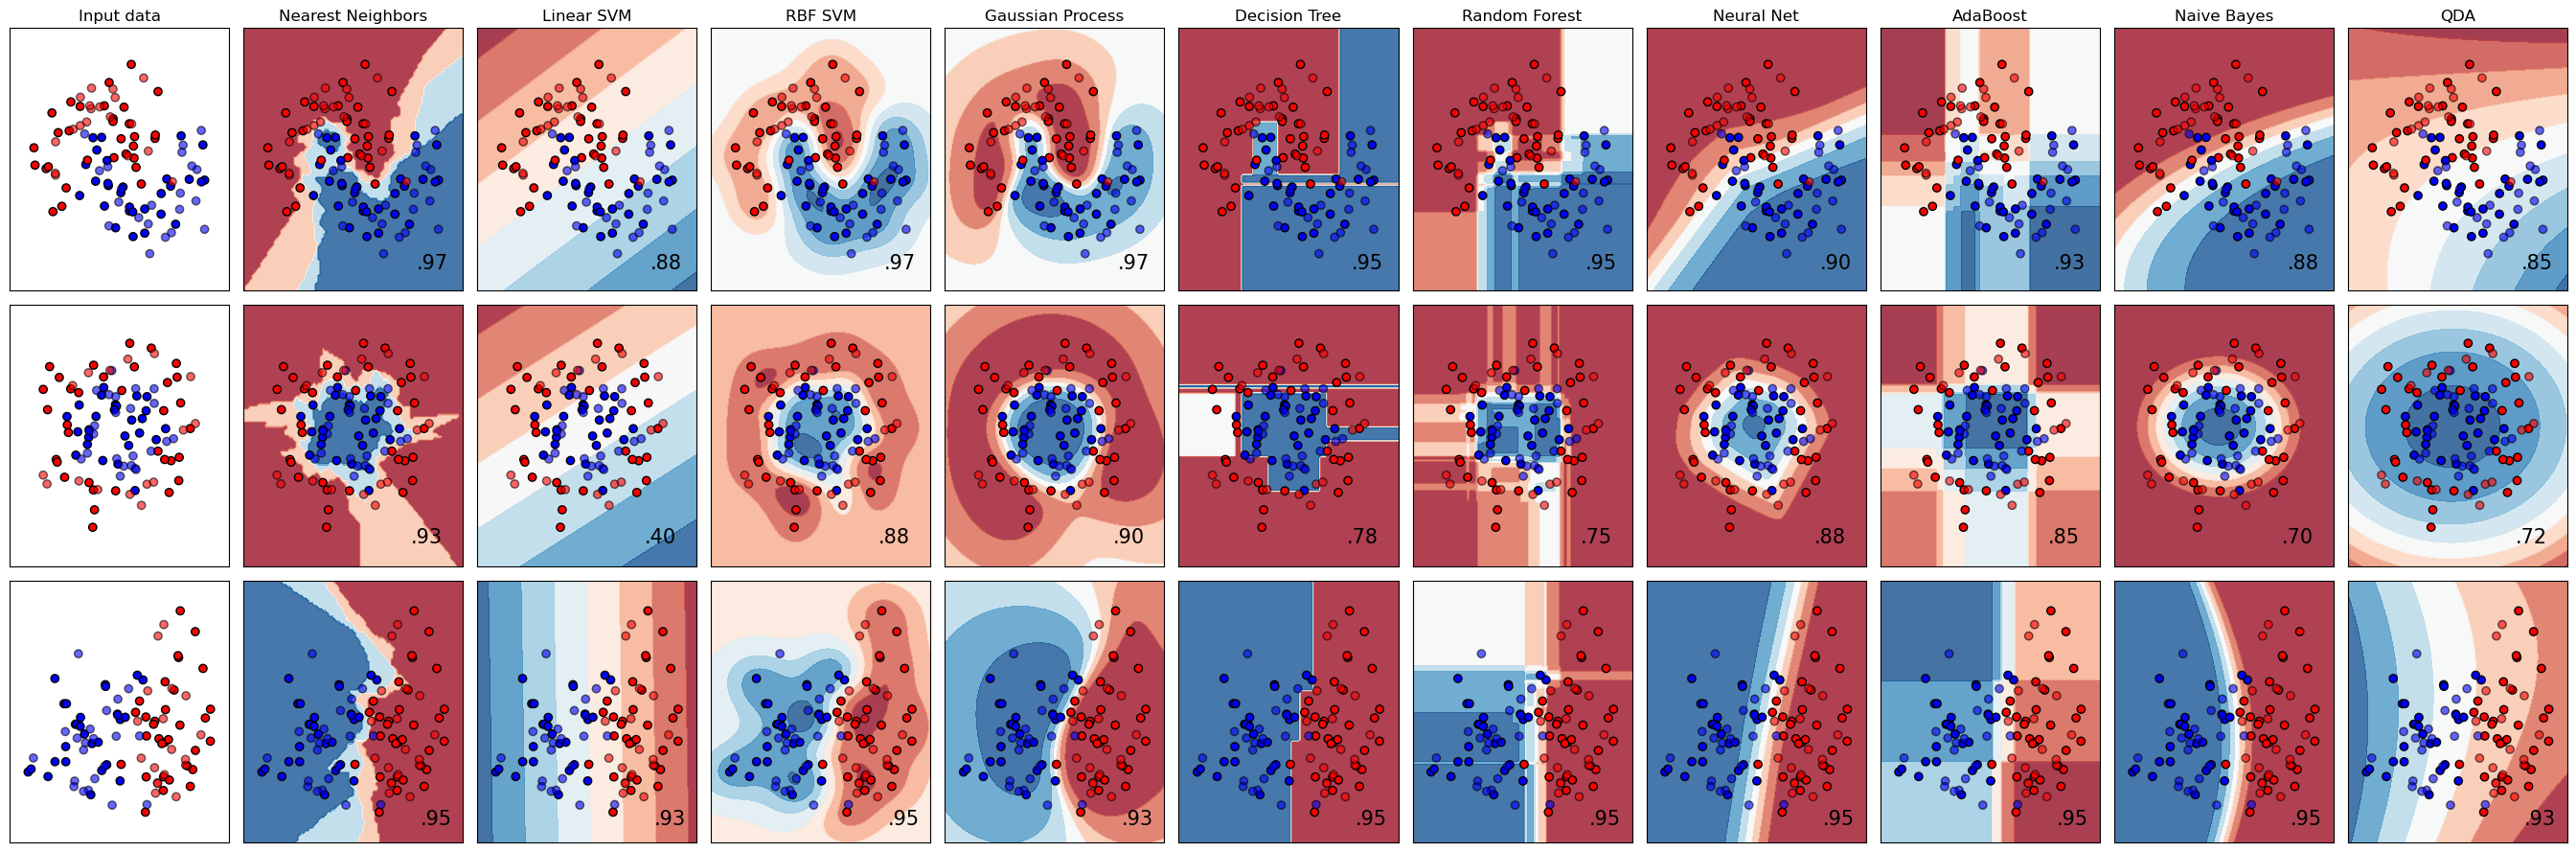

In [17]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\owhon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: Mini

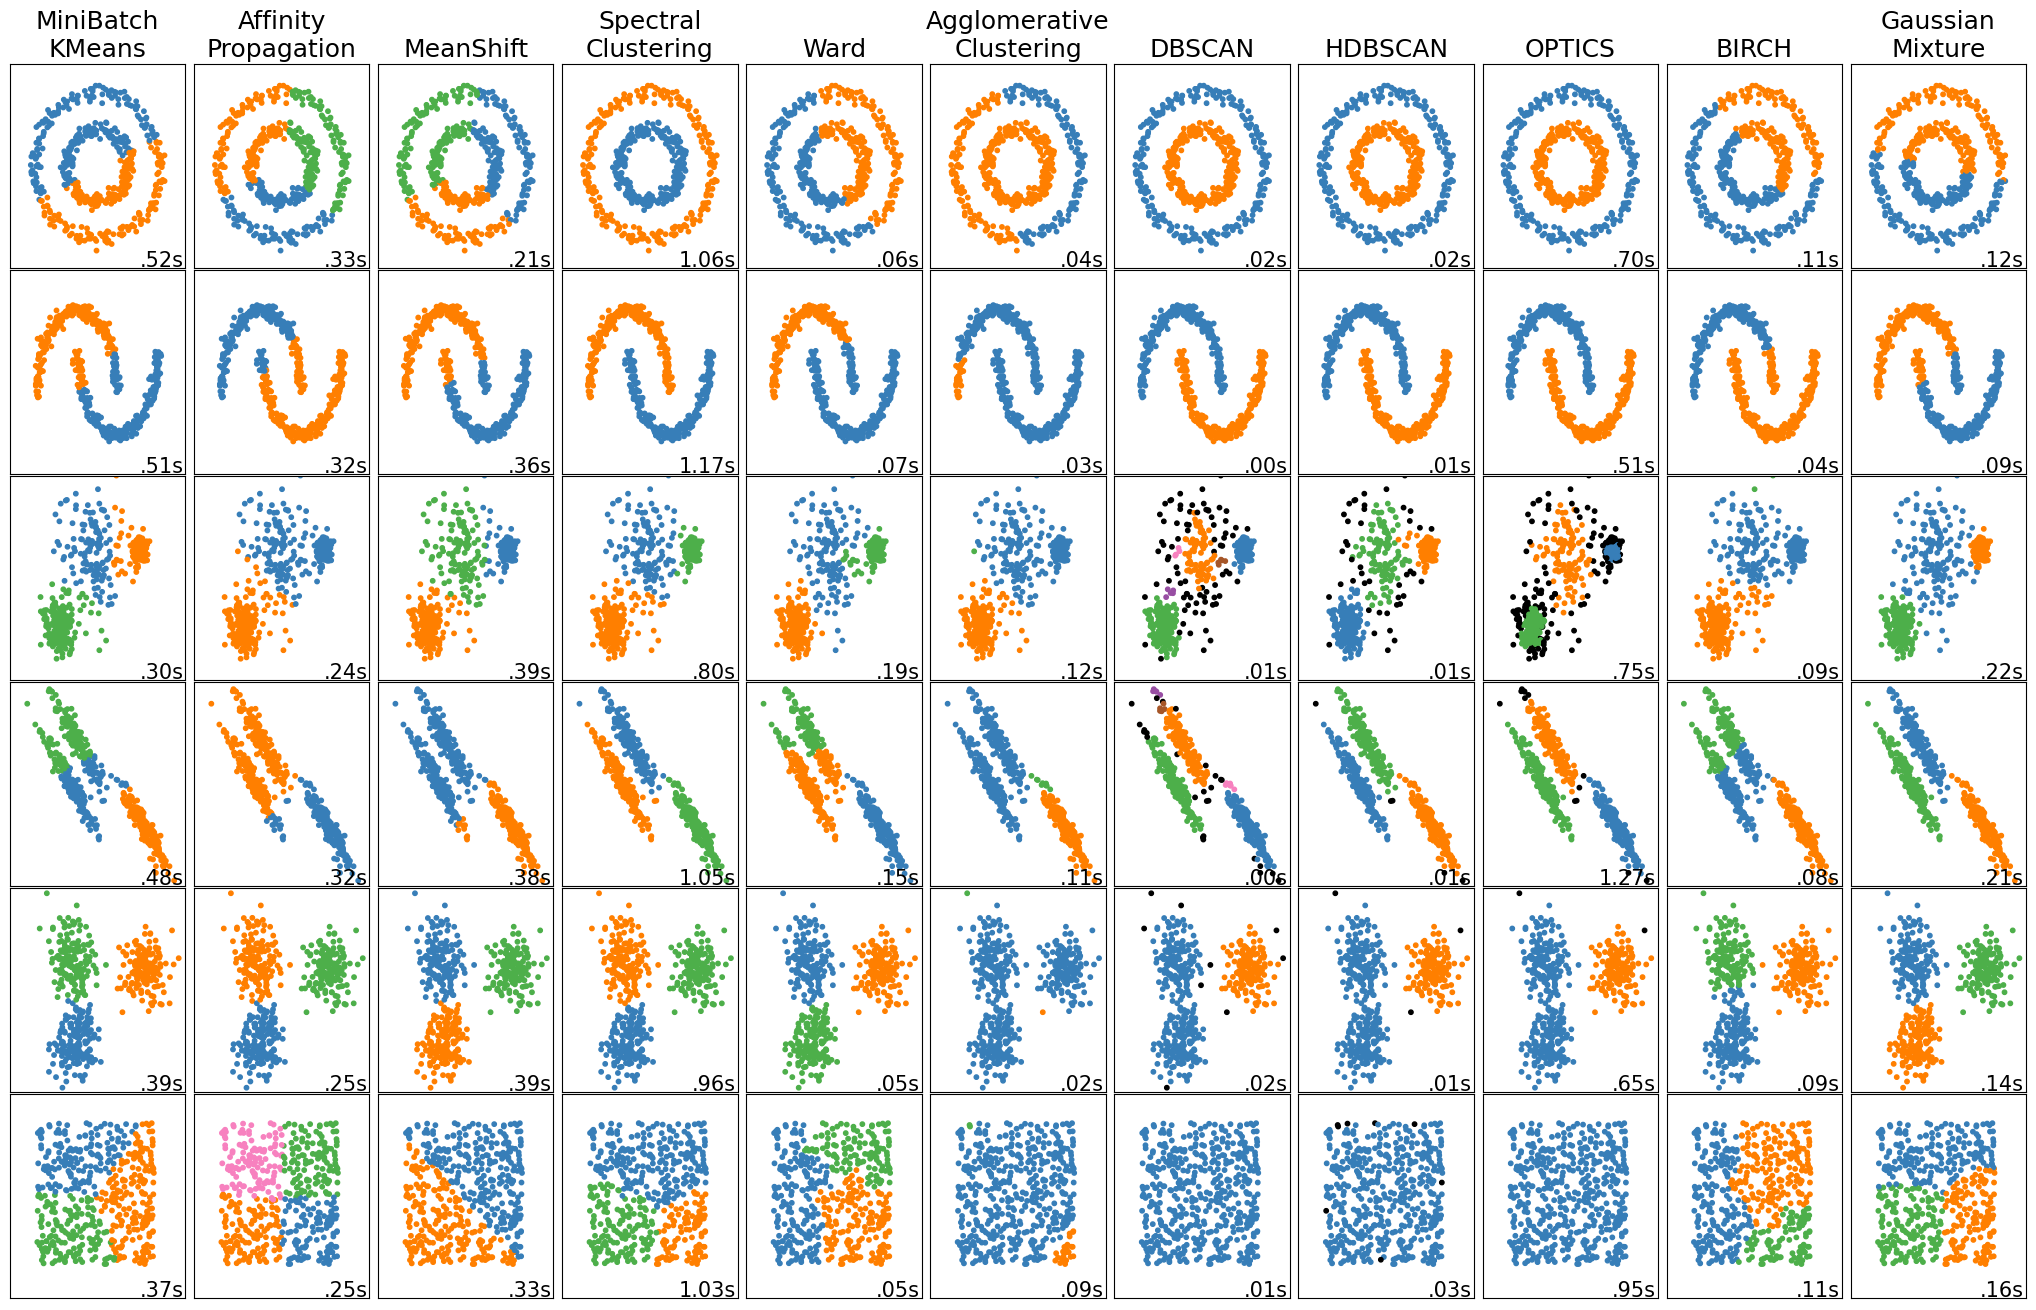

In [3]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
    "allow_single_cluster": True,
    "hdbscan_min_cluster_size": 15,
    "hdbscan_min_samples": 3,
    "random_state": 42,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(
        n_clusters=params["n_clusters"],
        random_state=params["random_state"],
    )
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=params["random_state"],
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    hdbscan = cluster.HDBSCAN(
        min_samples=params["hdbscan_min_samples"],
        min_cluster_size=params["hdbscan_min_cluster_size"],
        allow_single_cluster=params["allow_single_cluster"],
    )
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"],
        preference=params["preference"],
        random_state=params["random_state"],
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"],
        covariance_type="full",
        random_state=params["random_state"],
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("HDBSCAN", hdbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [5]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [7]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

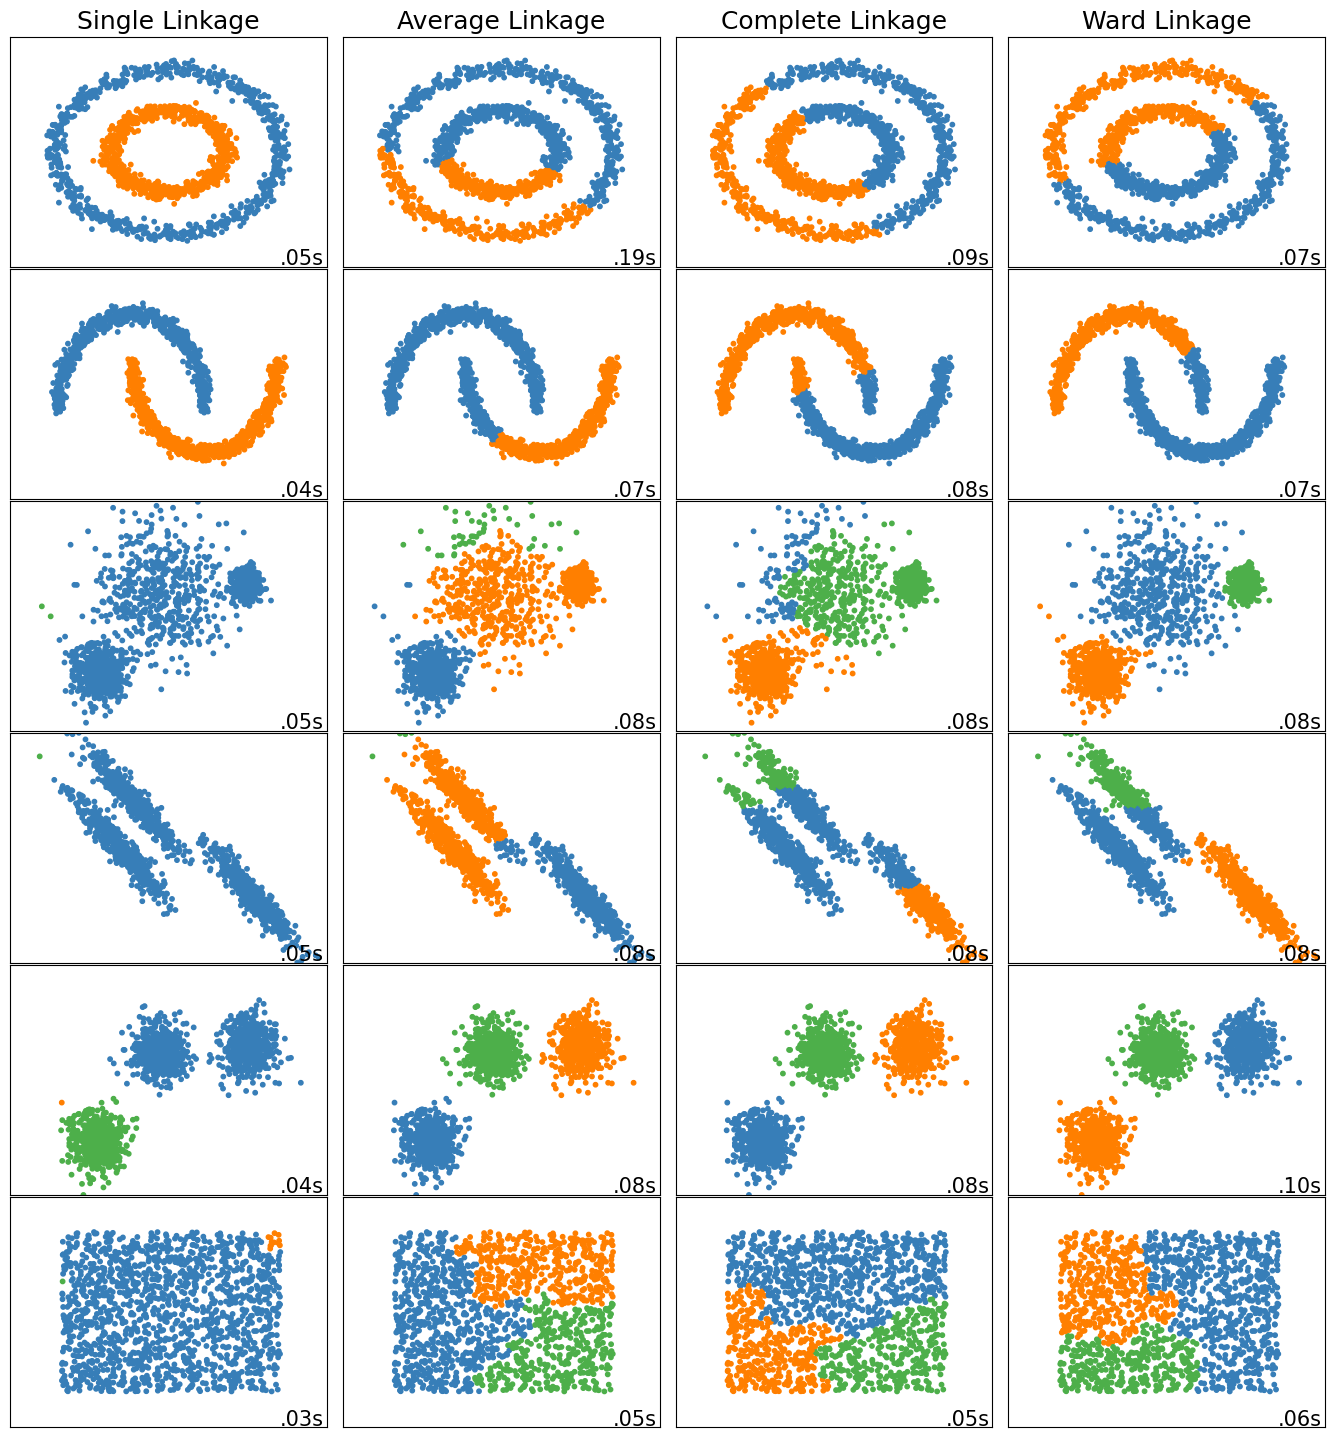

In [9]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [17]:
import numpy as np


def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0):
    rng = np.random.RandomState(seed)
    X = np.concatenate(
        [
            rng.randn(n_samples, n_features) @ cov_class_1,
            rng.randn(n_samples, n_features) @ cov_class_2 + np.array([1, 1]),
        ]
    )
    y = np.concatenate([np.zeros(n_samples), np.ones(n_samples)])
    return X, y

In [19]:
covariance = np.array([[1, 0], [0, 1]])
X_isotropic_covariance, y_isotropic_covariance = make_data(
    n_samples=1_000,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
covariance = np.array([[0.0, -0.23], [0.83, 0.23]])
X_shared_covariance, y_shared_covariance = make_data(
    n_samples=300,
    n_features=2,
    cov_class_1=covariance,
    cov_class_2=covariance,
    seed=0,
)
cov_class_1 = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
cov_class_2 = cov_class_1.T
X_different_covariance, y_different_covariance = make_data(
    n_samples=300,
    n_features=2,
    cov_class_1=cov_class_1,
    cov_class_2=cov_class_2,
    seed=0,
)

In [21]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.inspection import DecisionBoundaryDisplay


def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(["tab:red", "tab:blue"])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="pcolormesh",
        ax=ax,
        cmap="RdBu",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="predict_proba",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], "tab:red", ax)
    plot_ellipse(estimator.means_[1], covariance[1], "tab:blue", ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set(xticks=[], yticks=[])

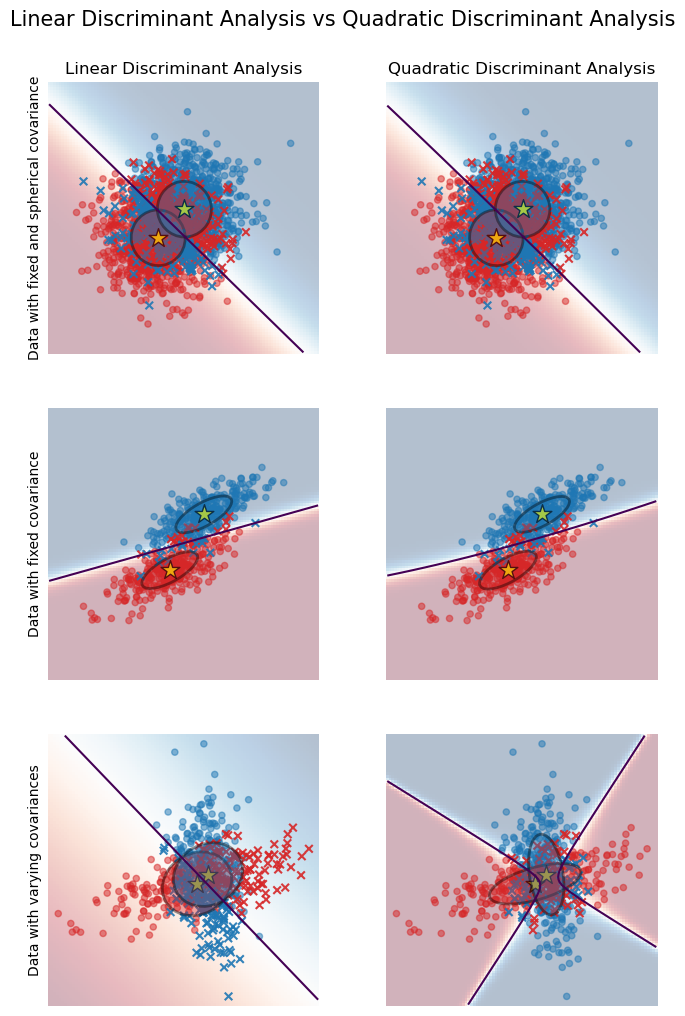

In [23]:
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

fig, axs = plt.subplots(nrows=3, ncols=2, sharex="row", sharey="row", figsize=(8, 12))

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

for ax_row, X, y in zip(
    axs,
    (X_isotropic_covariance, X_shared_covariance, X_different_covariance),
    (y_isotropic_covariance, y_shared_covariance, y_different_covariance),
):
    lda.fit(X, y)
    plot_result(lda, X, y, ax_row[0])
    qda.fit(X, y)
    plot_result(qda, X, y, ax_row[1])

axs[0, 0].set_title("Linear Discriminant Analysis")
axs[0, 0].set_ylabel("Data with fixed and spherical covariance")
axs[1, 0].set_ylabel("Data with fixed covariance")
axs[0, 1].set_title("Quadratic Discriminant Analysis")
axs[2, 0].set_ylabel("Data with varying covariances")
fig.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.94,
    fontsize=15,
)
plt.show()

Accuracy (train) for L1 logistic: 83.3%
Accuracy (train) for L2 logistic (Multinomial): 82.7%
Accuracy (train) for L2 logistic (OvR): 79.3%
Accuracy (train) for Linear SVC: 82.0%
Accuracy (train) for GPC: 82.7%


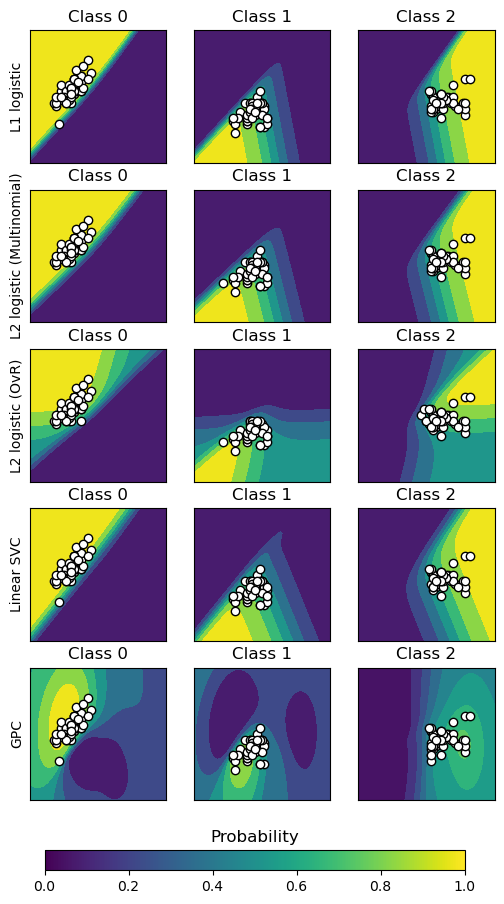

In [25]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(C=C, penalty="l1", solver="saga", max_iter=10000),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", max_iter=10000
    ),
    "L2 logistic (OvR)": OneVsRestClassifier(
        LogisticRegression(C=C, penalty="l2", solver="saga", max_iter=10000)
    ),
    "Linear SVC": SVC(kernel="linear", C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

fig, axes = plt.subplots(
    nrows=n_classifiers,
    ncols=len(iris.target_names),
    figsize=(3 * 2, n_classifiers * 2),
)
for classifier_idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X, y).predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy (train) for {name}: {accuracy:0.1%}")
    for label in np.unique(y):
        # plot the probability estimate provided by the classifier
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X,
            response_method="predict_proba",
            class_of_interest=label,
            ax=axes[classifier_idx, label],
            vmin=0,
            vmax=1,
        )
        axes[classifier_idx, label].set_title(f"Class {label}")
        # plot data predicted to belong to given class
        mask_y_pred = y_pred == label
        axes[classifier_idx, label].scatter(
            X[mask_y_pred, 0], X[mask_y_pred, 1], marker="o", c="w", edgecolor="k"
        )
        axes[classifier_idx, label].set(xticks=(), yticks=())
    axes[classifier_idx, 0].set_ylabel(name)

ax = plt.axes([0.15, 0.04, 0.7, 0.02])
plt.title("Probability")
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap="viridis"), cax=ax, orientation="horizontal"
)

plt.show()

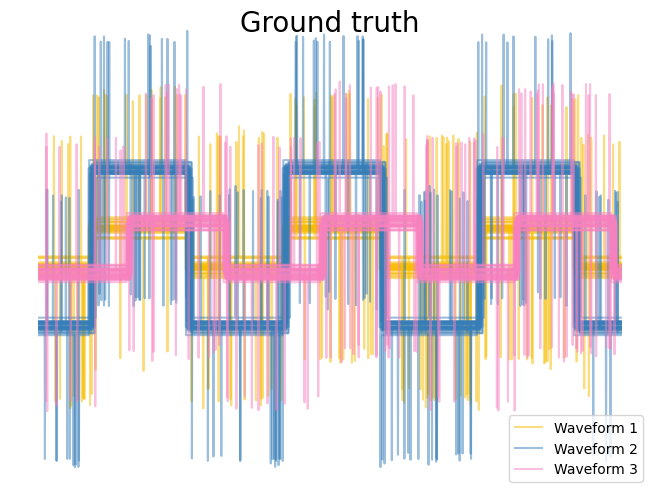

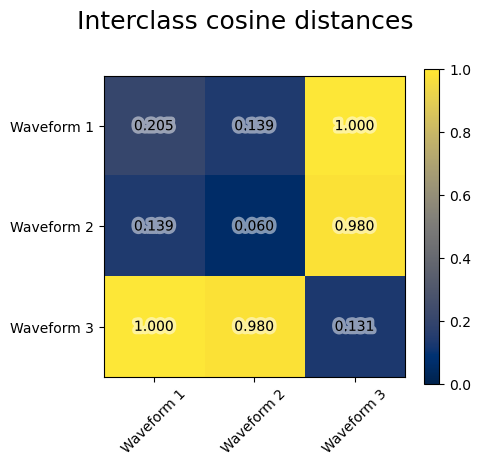

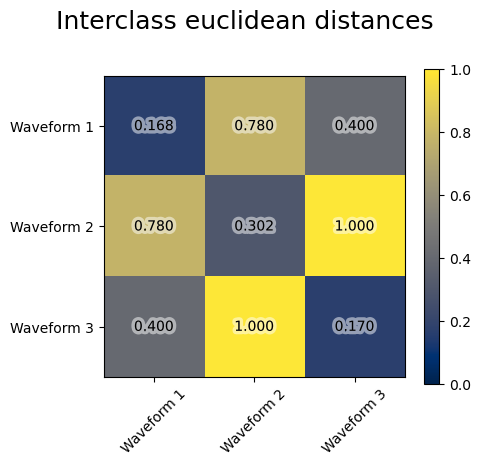

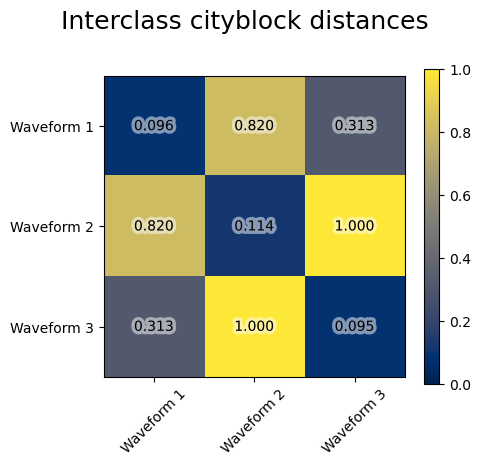

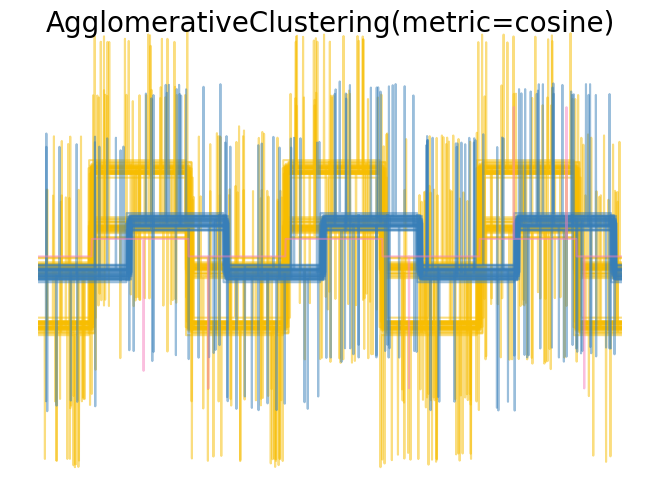

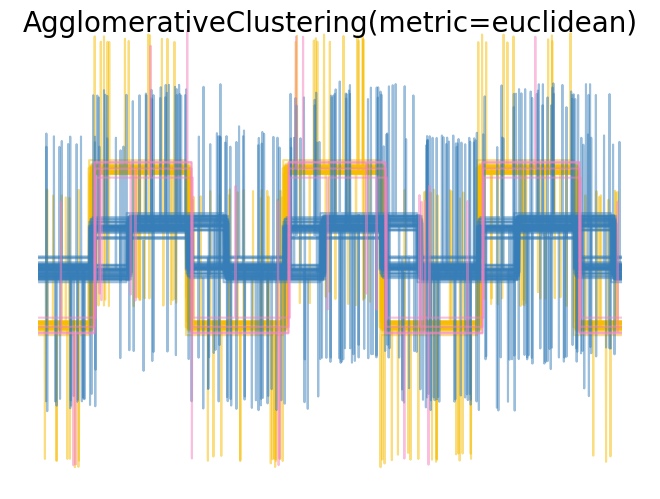

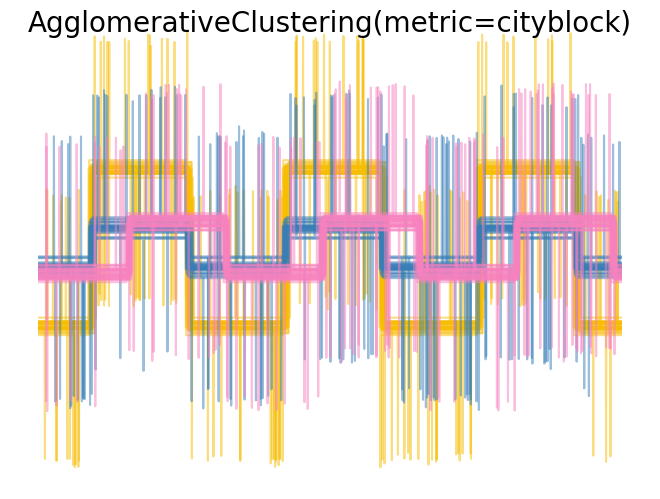

In [27]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30):
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

colors = ["#f7bd01", "#377eb8", "#f781bf"]

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")

plt.axis("tight")
plt.axis("off")
plt.suptitle("Ground truth", size=20, y=1)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y == i], X[y == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            t = plt.text(
                i,
                j,
                "%5.3f" % avg_dist[i, j],
                verticalalignment="center",
                horizontalalignment="center",
            )
            t.set_path_effects(
                [PathEffects.withStroke(linewidth=5, foreground="w", alpha=0.5)]
            )

    plt.imshow(avg_dist, interpolation="nearest", cmap="cividis", vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18, y=1)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", metric=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, color in zip(np.arange(model.n_clusters), colors):
        plt.plot(X[model.labels_ == l].T, c=color, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(metric=%s)" % metric, size=20, y=1)


plt.show()

If you want to check out the lab from the previous year when I went through this step by step, it's in the old class: https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Lab13.1_machine_learning_adv.ipynb
and
https://github.com/chsharrison/IntroSciComp_S2021/blob/main/Class_materials/Lab13.2_machine_learning_adv.ipynb


# Lab 13.1

#### E.0 Complete the previous labs if you are behind.

#### E.1 Complete Ch 1-2 of "Supervised Learning with scikit-learn". Don't forget to turn in your scores

**Notes** Make notes for yourself on progamming tecniques and commands you learned in the this week, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

#### E.2 Work on your final project